In [1]:
import pandas as pd

In [2]:
f = open("clara_chat.txt")

In [3]:
lines = f.readlines()

In [4]:
lines2 = []

In [5]:
for line in lines:
    try:
        tokens = line.split(":")
        t1 = ":".join(tokens[0:2])
        t2 = tokens[3].strip()
        text = tokens[4:]
        text = ":".join(text).strip()
        lines2.append([t1, t2, text])
    except:
        print("couldn't process")
        continue
# lines[0]

couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process
couldn't process


In [6]:
df = pd.DataFrame(lines2)

In [7]:
df.columns = ['created', 'sender', 'text']
import numpy as np
df = df[np.invert(df['text'].str.contains('image omitted'))]

In [8]:
df['len'] = df['text'].str.len()

In [9]:
for sender in df['sender'].unique():
    print(sender,df[df['sender']==sender]['len'].mean())

Clara 33.115695224719104
Riccardo Conci 46.56977375565611
Missed Call 0.0
Messages you send to this chat and calls are now secured with end-to-end encryption. 0.0


In [10]:
df['created'] = pd.to_datetime(df['created'])

In [11]:
df = df.set_index('created')

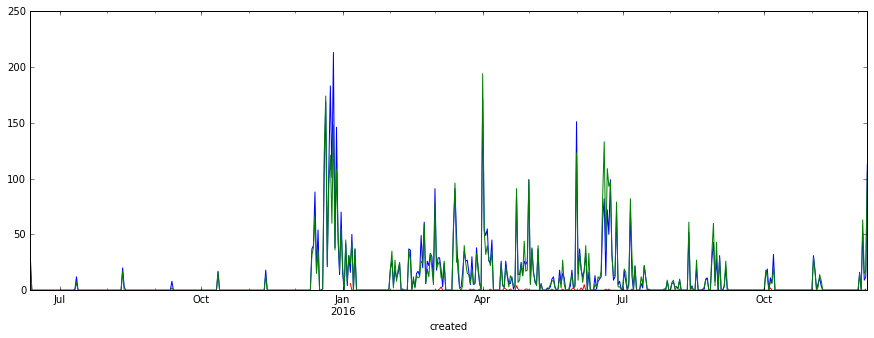

In [12]:
%matplotlib inline
tss = {}
for sender in df['sender'].unique():
    tmp = df[df['sender']==sender]
    tss[sender.strip()] = tmp.resample('D', how='count')['sender']
    tmp.resample('D', how='count')['sender'].plot(figsize=(15,5))

In [13]:
rs = pd.DataFrame(tss)

In [14]:
rs['diff'] = rs['Clara'] - rs['Riccardo Conci']

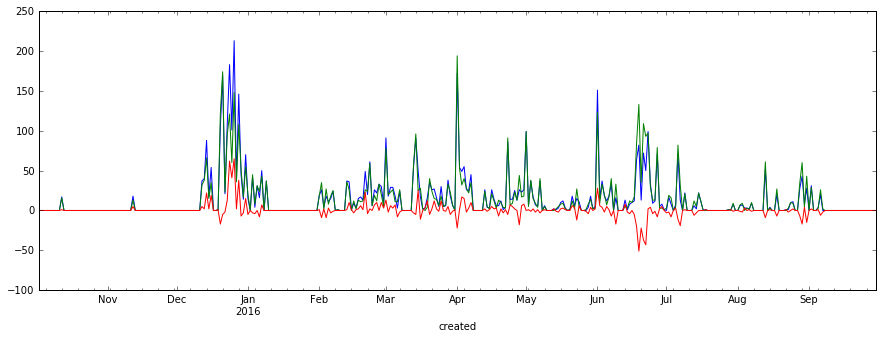

In [15]:
tmp = rs[rs.index>'2015-10-01']
tmp = tmp[tmp.index<'2016-10-01']
tmp['Clara'].plot(figsize=(15,5))
tmp['Riccardo Conci'].plot(figsize=(15,5))
tmp['diff'].plot(figsize=(15,5))

In [16]:
from wordcloud import WordCloud
import seaborn as sns

/Users/riccardoconci/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [17]:
def plotText(text):
    wordcloud = WordCloud().generate(text)
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud)
    plt.axis("off")

Riccardo Conci


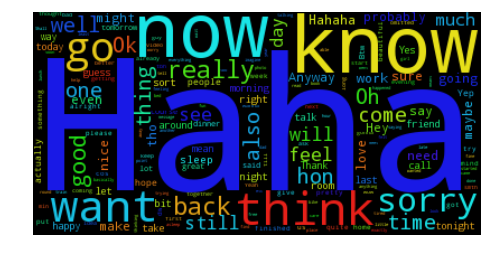

Clara


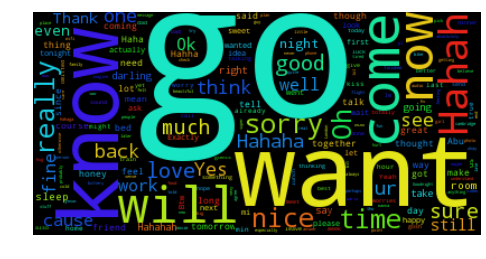

In [18]:
import matplotlib.pyplot as plt
for sender in ['Riccardo Conci', 'Clara']:
    text = " ".join(df[df['sender']==sender]['text'].tolist())
    print(sender)
    plotText(text)
    plt.show()

In [19]:
def getPolarity(text):
    import textblob
    o = textblob.TextBlob(text)
    return o.sentiment[0]

In [20]:
df['polarity'] = df['text'].apply(getPolarity)

In [21]:
for sender in df['sender'].unique():
    print(sender)
    print(df[df['sender']==sender]['polarity'].mean())

Clara
0.07758144502381617
Riccardo Conci
0.10285994303664604
Missed Call
0.0
Messages you send to this chat and calls are now secured with end-to-end encryption.
0.0


In [22]:
df[df['polarity']<0]['sender'].value_counts()

Riccardo Conci    765
Clara             696
Name: sender, dtype: int64

Riccardo Conci count    5525.000000
mean        0.102860
std         0.281612
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.225000
max         1.000000
Name: polarity, dtype: float64
Clara count    5696.000000
mean        0.077581
std         0.285080
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.000000
Name: polarity, dtype: float64


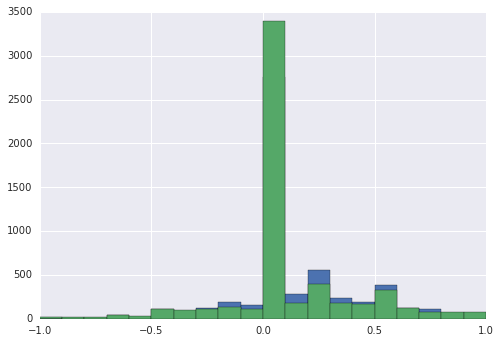

In [23]:
for sender in ['Riccardo Conci', 'Clara']:
#     plt.show()
    df[df['sender']==sender]['polarity'].hist(bins=20)
    print(sender, df[df['sender']==sender]['polarity'].describe())

In [24]:
df = df[df['sender'].isin(['Riccardo Conci', 'Clara'])]

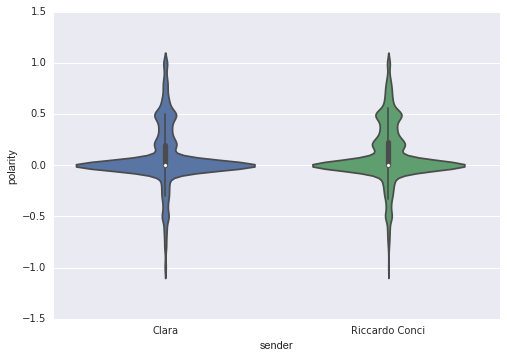

In [25]:
sns.violinplot(data=df, x='sender', y='polarity')

In [26]:
import textblob
o = textblob.TextBlob(text.lower())
print (o.word_counts["honey"])


41


In [27]:
print(len(df[df['text'].str.contains('honey', case=False)]))

62


In [28]:
df['sender'].unique()

array(['Clara', 'Riccardo Conci'], dtype=object)

In [29]:
import numpy as np
print(len(df))
df = df[np.invert(df['text'].str.contains('image omitted'))]
print(len(df))
df1 = df[df['sender']=='Clara']
df2 = df[df['sender']=='Riccardo Conci']

11221
11221


In [30]:
text1 = " ".join(df1['text'].tolist())
text2 = " ".join(df2['text'].tolist())

In [31]:
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams
tokenizer = RegexpTokenizer(r'\w+')
from collections import Counter

In [32]:
text1 = tokenizer.tokenize(text1)
text2 = tokenizer.tokenize(text2)

In [33]:
def compare(text1, text2, N):
    grams1 = Counter(list(ngrams(text1, N)))
    grams2 = Counter(list(ngrams(text2, N)))
    d1 = pd.DataFrame.from_dict(grams1, orient='index').reset_index()
    d2 = pd.DataFrame.from_dict(grams2, orient='index').reset_index()    
    d1.columns = ['term', 'count']
    d2.columns = ['term', 'count']    
    d1['frequency'] = d1['count'].astype(float)/len(d1)
    d2['frequency'] = d2['count'].astype(float)/len(d2)    
    d = pd.merge(d1, d2, on='term')
    d['diff_freq'] = d['frequency_x'] - d['frequency_y']
    print(grams1.most_common(10))
    print("\n")
    print(grams2.most_common(10))
    return d

In [34]:
d = compare(text1, text2, 3)

[(('I', 'don', 't'), 87), (('I', 'can', 't'), 46), (('I', 'm', 'sorry'), 37), (('don', 't', 'know'), 31), (('I', 'm', 'sure'), 27), (('I', 'm', 'so'), 26), (('I', 'didn', 't'), 26), (('t', 'want', 'to'), 25), (('I', 'love', 'you'), 22), (('I', 'm', 'not'), 22)]


[(('I', 'don', 't'), 173), (('don', 't', 'know'), 60), (('I', 'didn', 't'), 52), (('I', 'm', 'not'), 48), (('I', 'm', 'sorry'), 45), (('I', 'll', 'be'), 44), (('t', 'want', 'to'), 39), (('it', 's', 'not'), 36), (('don', 't', 'want'), 35), (('I', 'think', 'I'), 35)]


In [35]:
d.sort('diff_freq', inplace=True)

/Users/riccardoconci/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [36]:
d[d['term'].astype(str).str.contains('😘', case=False)]
#words to search: love, know, sure, care, sorry, why, 

,term,count_x,frequency_x,count_y,frequency_y,diff_freq


In [37]:
d.sort('count_y')

/Users/riccardoconci/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,term,count_x,frequency_x,count_y,frequency_y,diff_freq
189,"(and, I, see)",1,0.000029,1,0.000022,0.000007
1364,"(that, for, me)",1,0.000029,1,0.000022,0.000007
735,"(social, life, to)",1,0.000029,1,0.000022,0.000007
1363,"(spend, New, Years)",1,0.000029,1,0.000022,0.000007
734,"(to, write, an)",1,0.000029,1,0.000022,0.000007
1393,"(And, we, can)",1,0.000029,1,0.000022,0.000007
726,"(work, a, bit)",1,0.000029,1,0.000022,0.000007
1419,"(are, thinking, of)",1,0.000029,1,0.000022,0.000007
2971,"(the, actual, papers)",1,0.000029,1,0.000022,0.000007
754,"(to, take, care)",1,0.000029,1,0.000022,0.000007


In [38]:
len(df1[df1['text'].str.contains("😉")])

35

In [39]:
len(df2[df2['text'].str.contains("😉")])

60

In [40]:
df['created'] = pd.to_datetime(df['created'])

KeyError: 'created'

In [ ]:
df = df.set_index('created')

In [ ]:
df.resample('W', how='mean')['polarity'].plot()

In [41]:
df.resample('W', how='mean')['polarity']

created
2015-06-14    0.074181
2015-06-21         NaN
2015-06-28         NaN
2015-07-05         NaN
2015-07-12    0.116141
2015-07-19         NaN
2015-07-26         NaN
2015-08-02         NaN
2015-08-09         NaN
2015-08-16    0.043225
2015-08-23         NaN
2015-08-30         NaN
2015-09-06         NaN
2015-09-13    0.196875
2015-09-20         NaN
2015-09-27         NaN
2015-10-04         NaN
2015-10-11         NaN
2015-10-18    0.113111
2015-10-25         NaN
2015-11-01         NaN
2015-11-08         NaN
2015-11-15    0.162059
2015-11-22         NaN
2015-11-29         NaN
2015-12-06         NaN
2015-12-13    0.093360
2015-12-20    0.099951
2015-12-27    0.096693
2016-01-03    0.064113
                ...   
2016-05-22    0.091966
2016-05-29    0.065794
2016-06-05    0.059780
2016-06-12    0.170113
2016-06-19    0.115262
2016-06-26    0.074171
2016-07-03    0.067515
2016-07-10    0.069222
2016-07-17    0.038044
2016-07-24   -0.625000
2016-07-31    0.257528
2016-08-07    0.079702
201